Assignment 17

In [39]:
import numpy as np
import cv2
import math
import sys
import time
import enum
import matplotlib.pyplot as plt
import networkx as nx

class Location:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    def __str__(self):
        return f"({self.x}, {self.y}, {self.z})"
    def __repr__(self):
        return self.__str__()

class Beacon:
    def __init__(self, location, id):
        self.location = location
        self.id = id
    def __str__(self):
        return "Beacon {} at {}".format(self.id, self.location)
    def __repr__(self):
        return self.__str__()

class Scanner:
    def __init__(self, location, id):
        self.id = id
        self.location = location
        self.beacons = []
    def AddBeacon(self, beacon):
        self.beacons.append(beacon)



def GetSensorData(dataset):
    data = []
    with open(dataset, 'r') as f:
        data = f.readlines()
    # strip the new line character
    
    data = [x.strip() for x in data]

    scanners = []
    sensor = {}
    beaconCount = 0
    scannerCount = 0
    for i in range(len(data)):
        #print(data[i])
        if (data[i].__contains__('scanner')):
            sensor = Scanner(Location(0, 0, 0), scannerCount)
            scannerCount += 1
            scanners.append(sensor)
        elif (data[i] == ''):
            continue
        else:
            location = data[i].split(',')
            beacon = Beacon(Location(int(location[0]), int(location[1]), int(location[2])), beaconCount)
            beaconCount += 1
            sensor.AddBeacon(beacon)

    return scanners

# create a distance map between each beacon in a scanner report
def CreateDistanceMaps(scanner):
    distanceMaps = []
    for i in range(len(scanner.beacons)):
        distanceMaps.append([scanner.beacons[i] , []])
        for j in range(len(scanner.beacons)):
            if (i == j):
                continue
            else:
                distanceMaps[i][1].append([scanner.beacons[j], math.sqrt(math.pow(scanner.beacons[i].location.x - scanner.beacons[j].location.x, 2) + math.pow(scanner.beacons[i].location.y - scanner.beacons[j].location.y, 2) + math.pow(scanner.beacons[i].location.z - scanner.beacons[j].location.z, 2))])
        # Sort the distance map by distance
        distanceMaps[i][1].sort(key=lambda x: x[1])
    
    return distanceMaps

# check for each distancemap if an x amount of beacons are in a similar distance from each other
def CheckForBeacons(distanceMap, compairmap, x):
    count = 0
    for i in range(len(distanceMap)):
        for j in range(len(compairmap)):
            if (distanceMap[i][1] == compairmap[j][1]):
                #print("Found a match")
                count += 1
                if (count == x-1):
                    return True
    #print("match count: {}".format(count))
    return False


scanner 0 and scanner 1 have similar beacons : 0 and 28
scanner 1 and scanner 3 have similar beacons : 31 and 78
scanner 1 and scanner 4 have similar beacons : 27 and 105
scanner 2 and scanner 4 have similar beacons : 50 and 115


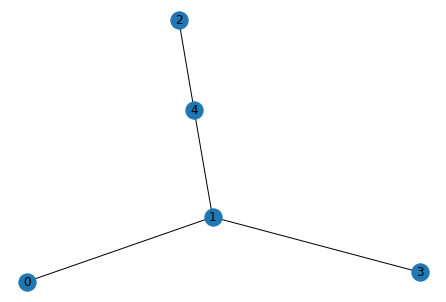

In [40]:
scanners = GetSensorData('./data/aoc19_test2.txt')
#print(scanners)

# print the amount of beacons in each scanner
#for i in range(len(scanners)):
    #print(len(scanners[i].beacons))

# create a distance map between each beacon in a scanner report
DistanceMap = []
for i in range(len(scanners)):
    DistanceMap.append([scanners[i] ,CreateDistanceMaps(scanners[i])])


# print for on each line the distance between each beacon
#for i in range(len(DistanceMap)):
#    string = ''
#    for j in range(len(DistanceMap[i][1])):
#        string += str(DistanceMap[i][1][j][1]) + ','
#    print(string)
scannerConnections = []
for i in range(len(DistanceMap)):
    for j in range(i+1, len(DistanceMap)):
        if (i == j):
            continue
        else:
            breakbool = False
            for k in range(len(DistanceMap[i][1])):
                for l in range(len(DistanceMap[j][1])):
                    if( CheckForBeacons(DistanceMap[i][1][k][1], DistanceMap[j][1][l][1], 12)):
                        print(f'scanner {i} and scanner {j} have similar beacons : {DistanceMap[i][1][k][0].id} and {DistanceMap[j][1][l][0].id}')
                        breakbool = True
                        scannerConnections.append([i, j])
                if (breakbool):
                    break

G = nx.Graph()
for i in range(len(DistanceMap)):
    G.add_node(i)
for i in range(len(scannerConnections)):
    G.add_edge(scannerConnections[i][0], scannerConnections[i][1])

nx.draw(G, with_labels=True)
plt.show()

#G.add_edge_from(scannerConnections)
#nx.draw(G, with_labels=True, font_weight='bold')
#nx.draw_shell(G, with_labels=True, font_weight='bold')
#plt.show()  



In [44]:
scanners = GetSensorData('./data/aoc19.txt')
#print(scanners)

# print the amount of beacons in each scanner
#for i in range(len(scanners)):
    #print(len(scanners[i].beacons))

# create a distance map between each beacon in a scanner report
DistanceMap = []
for i in range(len(scanners)):
    DistanceMap.append([scanners[i] ,CreateDistanceMaps(scanners[i])])



scannerConnections = []
for i in range(len(DistanceMap)):
    for j in range(i+1, len(DistanceMap)):
        if (i == j):
            continue
        else:
            breakbool = False
            for k in range(len(DistanceMap[i][1])):
                for l in range(len(DistanceMap[j][1])):
                    if( CheckForBeacons(DistanceMap[i][1][k][1], DistanceMap[j][1][l][1], 12)):
                        print(f'scanner {i} and scanner {j} have similar beacons : {DistanceMap[i][1][k][0].id} and {DistanceMap[j][1][l][0].id}')
                        breakbool = True
                        scannerConnections.append([i, j])
                        break
                if (breakbool):
                    break

scanner 0 and scanner 17 have similar beacons : 2 and 445
scanner 1 and scanner 7 have similar beacons : 29 and 184
scanner 1 and scanner 12 have similar beacons : 28 and 322
scanner 1 and scanner 23 have similar beacons : 25 and 612
scanner 1 and scanner 36 have similar beacons : 26 and 937
scanner 2 and scanner 25 have similar beacons : 52 and 673
scanner 3 and scanner 23 have similar beacons : 79 and 614
scanner 4 and scanner 21 have similar beacons : 103 and 557
scanner 4 and scanner 25 have similar beacons : 103 and 649
scanner 5 and scanner 36 have similar beacons : 129 and 956
scanner 6 and scanner 11 have similar beacons : 154 and 297
scanner 6 and scanner 13 have similar beacons : 157 and 351
scanner 7 and scanner 10 have similar beacons : 180 and 283
scanner 7 and scanner 11 have similar beacons : 181 and 299
scanner 8 and scanner 19 have similar beacons : 206 and 492
scanner 8 and scanner 29 have similar beacons : 206 and 764
scanner 9 and scanner 17 have similar beacons : 2

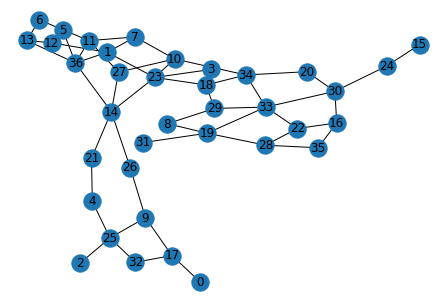

In [46]:
G = nx.Graph()
for i in range(len(DistanceMap)):
    G.add_node(i)
for i in range(len(scannerConnections)):
    G.add_edge(scannerConnections[i][0], scannerConnections[i][1])

nx.draw(G, with_labels=True)
plt.show()